
# Scenario 1: State tax board

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year.
Goal for Scenario #1: Your task is as follows:

Calculate the yearly liquor sales for each score using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.

Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of each store. You must use the sales from Jan to March per store as one of your variables.

Use your model for 2015 to estimate total sales for each store in 2016, extrapolating from the sales so far for Jan-March of 2016.

Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.

Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.

Challenging Bonus: We did not cover the topics of regularization for linear regression this week, but those feeling bold can try to use and understand regularizing linear regressions. This will require self-guided research/reading and scikit-learn functions that we have not gone over in class! Use cross-validation to tune the regularization parameter that maximizes R^2 on your holdout sets for the Ridge regression and the Lasso Regression. Do the regularized models perform better than the non-regularized model? Which regularized model performs better? What is the Ridge regression doing? What is the Lasso doing.


# Suggested Ways to Get Started
### Tips for both scenarios:
   Likely you will find it useful to reduce the data set with pandas before fitting models. You may want to make a new table with the following data for each store:
   will turn <font color = 'red'>red</font> when done
   
  
  <font color = 'red'>
  * The vendor name (really vendor number)?
 
  * The location data (zip code, county, city)
  </font>
   <span style="color:red"></span>
   <span style="color:red">
    * The total sales for the year
      * need to create a new column for the year
    * The total sales for each month (or at least for Jan-March for the first scenario)
      * need to create a new column for the month</span>
    * The total volume sold
    * The total number of bottles sold
    * The average price per bottle (perhaps useful for distinguishing store types)
  

We're using linear regression for our models. Find the best model you can, but don't fret if you cannot get a really good model. We'll learn techniques later that will help improve your analysis, such as classifying store types. For now do the best you can with the tools that you have.

Take advantage of pandas as much as possible -- the groupby, summation, and other features of DataFrames can make computing the necessary summary data much easier. This is a great time to practice what you learned in Week 2!
Take care in the presentation of your results. Your audience is likely non-technical, so explain your findings in accessible language.
General suggestions:
Write pseudocode before you write actual code. Thinking through the logic of something helps.
Read the docs for whatever technologies you use. Most of the time, there is a tutorial that you can follow, but not always, and learning to read documentation is crucial to your success!

##### Document everything.
##### Useful Resources
##### Documentation for SKLearn
##### What is regularization?

# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

### Pseudo Code

  1. load in data
  * convert from string to data format
  * create new dataframe 
    * with subset of data
    * with added columns with relevant transformations for use down the road
      * indexed by Store
        * total 2015 sales
          * 2015 total sales by month
        * total 2012 sales
        * total 2013 sales
        * total 2014 sales


# Problem Statement (assuming that today is January 1, 2016)
The Iowa State Legislature is contemplating changing the State's liquor tax rate. The State currently is has extensive data for the last 4 years on liquor sales. The legislature wants to know current liquor sales by county for the previous year and projections for those sales over the next quarter per county.  

# Goals
  * Provide graphs plotting total State liquor sales from 2012-2015
  * 

# Acquire the data

In [12]:
import pandas as pd

## Load the data into a DataFrame
df = pd.read_csv("./projects/Iowa_Liquor_sales.csv")

## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
print(df.columns)
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace("$", "")
df['Sale (Dollars)'] = df['Sale (Dollars)'].fillna(0)

#df = df.sample(n=200)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')


Likely you will find it useful to reduce the data set with pandas before fitting models. You may want to make a new table with the following data for each store: will turn red when done

The vendor name (really vendor number)
The location data (zip code, county, city) 
The total sales for the year
need to create a new column for the year
The total sales for each month (or at least for Jan-March for the first scenario)
need to create a new column for the month
The total volume sold
The total number of bottles sold
The average price per bottle (perhaps useful for distinguishing store types)

In [10]:
df["Sale (Dollars)"] = df["Sale (Dollars)"].fillna(0)
print("filled")
# Create a new 'store-centric' dataframe
store_names = df["Store Number"].unique()

column_names = ["Zip Code", 
                            "County",
                            "City",
                            "Sales_Annual_2012",
                            "Sales_Annual_2013",
                            "Sales_Annual_2014",
                            "Sales_Annual_2015",
                            "Sales_Jan_2015",
                            "Sales_Feb_2015",
                            "Sales_Mar_2015",
                            "Sales_Apr_2015",
                            "Sales_May_2015",
                            "Sales_Jun_2015", 
                            "Sales_Jul_2015", 
                            "Sales_Aug_2015", 
                            "Sales_Sep_2015", 
                            "Sales_Oct_2015", 
                            "Sales_Nov_2015",
                            "Sales_Dec_2015",
                            "Sales_Jan_2016",
                            "Sales_Feb_2016",
                            "Sales_Mar_2016"]
stores = pd.DataFrame(index=store_names, columns=column_names)

#make sales total columns numeric
stores[["Sales_Annual_2012","Sales_Annual_2013",
                            "Sales_Annual_2014",
                            "Sales_Annual_2015",
                            "Sales_Jan_2015",
                            "Sales_Feb_2015",
                            "Sales_Mar_2015",
                            "Sales_Apr_2015",
                            "Sales_May_2015",
                            "Sales_Jun_2015", 
                            "Sales_Jul_2015", 
                            "Sales_Aug_2015", 
                            "Sales_Sep_2015", 
                            "Sales_Oct_2015", 
                            "Sales_Nov_2015",
                            "Sales_Dec_2015",
                            "Sales_Jan_2016",
                            "Sales_Feb_2016",
                            "Sales_Mar_2016"]].apply(pd.to_numeric)

#fill sales columns with 0's
stores[["Sales_Annual_2012","Sales_Annual_2013",
                            "Sales_Annual_2014",
                            "Sales_Annual_2015",
                            "Sales_Jan_2015",
                            "Sales_Feb_2015",
                            "Sales_Mar_2015",
                            "Sales_Apr_2015",
                            "Sales_May_2015",
                            "Sales_Jun_2015", 
                            "Sales_Jul_2015", 
                            "Sales_Aug_2015", 
                            "Sales_Sep_2015", 
                            "Sales_Oct_2015", 
                            "Sales_Nov_2015",
                            "Sales_Dec_2015",
                            "Sales_Jan_2016",
                            "Sales_Feb_2016",
                            "Sales_Mar_2016"]] = stores[["Sales_Annual_2012",
                            "Sales_Annual_2013",
                            "Sales_Annual_2014",
                            "Sales_Annual_2015",
                            "Sales_Jan_2015",
                            "Sales_Feb_2015",
                            "Sales_Mar_2015",
                            "Sales_Apr_2015",
                            "Sales_May_2015",
                            "Sales_Jun_2015", 
                            "Sales_Jul_2015", 
                            "Sales_Aug_2015", 
                            "Sales_Sep_2015", 
                            "Sales_Oct_2015", 
                            "Sales_Nov_2015",
                            "Sales_Dec_2015",
                            "Sales_Jan_2016",
                            "Sales_Feb_2016",
                            "Sales_Mar_2016"]].fillna(0)


filled


In [11]:
# Populate the stores dataframe with "Sa-les_Annual_2015" and "Sales_mmm_2015" columns with total sales per store
# from the original data and while we are at it, populate the zip, county, and city fields for each store


for index, row in df.iterrows():
    if row["Date"].year == 2012:
        stores.set_value(row["Store Number"],"Sales_Annual_2012", stores.loc[row["Store Number"]]["Sales_Annual_2012"] + float(row['Sale (Dollars)']))
    if row["Date"].year == 2013:
        stores.set_value(row["Store Number"],"Sales_Annual_2013", stores.loc[row["Store Number"]]["Sales_Annual_2013"] + float(row['Sale (Dollars)']))
    if row["Date"].year == 2014:
        stores.set_value(row["Store Number"],"Sales_Annual_2014", stores.loc[row["Store Number"]]["Sales_Annual_2014"] + float(row['Sale (Dollars)']))
    if row["Date"].year == 2015:
        stores.set_value(row["Store Number"],"Sales_Annual_2015", stores.loc[row["Store Number"]]["Sales_Annual_2015"] + float(row['Sale (Dollars)']))
        if stores.loc[row["Store Number"]]["Zip Code"] != 0.0:
            stores.set_value(row["Store Number"],"Zip Code", row['Zip Code'])           
            stores.set_value(row["Store Number"],"County", row['County Number'])         
            stores.set_value(row["Store Number"],"City", row['City'])         
        if row["Date"].month == 1:
            stores.set_value(row["Store Number"],"Sales_Jan_2015", stores.loc[row["Store Number"]]["Sales_Jan_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 2:
            stores.set_value(row["Store Number"],"Sales_Feb_2015", stores.loc[row["Store Number"]]["Sales_Feb_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 3:
            stores.set_value(row["Store Number"],"Sales_Mar_2015", stores.loc[row["Store Number"]]["Sales_Mar_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 4:
            stores.set_value(row["Store Number"],"Sales_Apr_2015", stores.loc[row["Store Number"]]["Sales_Apr_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 5:
            stores.set_value(row["Store Number"],"Sales_May_2015", stores.loc[row["Store Number"]]["Sales_May_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 6:
            stores.set_value(row["Store Number"],"Sales_Jun_2015", stores.loc[row["Store Number"]]["Sales_Jun_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 7:
            stores.set_value(row["Store Number"],"Sales_Jul_2015", stores.loc[row["Store Number"]]["Sales_Jul_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 8:
            stores.set_value(row["Store Number"],"Sales_Aug_2015", stores.loc[row["Store Number"]]["Sales_Aug_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 9:
            stores.set_value(row["Store Number"],"Sales_Sep_2015", stores.loc[row["Store Number"]]["Sales_Sep_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 10:
            stores.set_value(row["Store Number"],"Sales_Oct_2015", stores.loc[row["Store Number"]]["Sales_Oct_2015"] + float(row['Sale (Dollars)']))
        elif row["Date"].month == 11:
            stores.set_value(row["Store Number"],"Sales_Nov_2015", stores.loc[row["Store Number"]]["Sales_Nov_2015"] + float(row['Sale (Dollars)']))
        else:
            stores.set_value(row["Store Number"],"Sales_Dec_2015", stores.loc[row["Store Number"]]["Sales_Dec_2015"] + float(row['Sale (Dollars)']))
print("Done")

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.



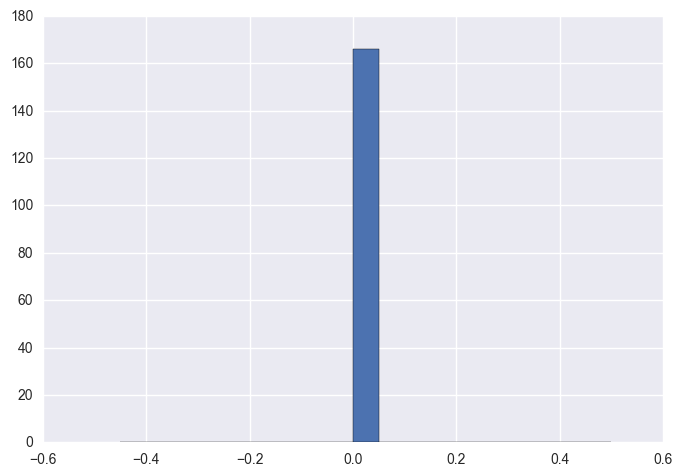

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
#print(sales[sales["Year"]==2015]["Bottles Sold"].sum())
      
#pivot_table = pd.pivot_table(df, index=["County", "Category"], values = ["Bottles Sold"])

# Single County
data = stores["Sales_Annual_2015"]
plt.hist(data, bins=20)
plt.show()


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [46]:
stores.corr()

,Sales_Annual_2012,Sales_Annual_2013,Sales_Annual_2014,Sales_Annual_2015,Sales_Jan_2015,Sales_Feb_2015,Sales_Mar_2015,Sales_Apr_2015,Sales_May_2015,Sales_Jun_2015,Sales_Jul_2015,Sales_Aug_2015,Sales_Sep_2015,Sales_Oct_2015,Sales_Nov_2015,Sales_Dec_2015,Sales_Jan_2016,Sales_Feb_2016,Sales_Mar_2016
Sales_Annual_2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Annual_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Annual_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Annual_2015,NaN,NaN,NaN,1.000000,0.069890,0.008876,0.056251,0.386151,0.243136,0.044236,0.012013,0.062556,0.133113,0.468182,0.013882,0.841891,NaN,NaN,NaN
Sales_Jan_2015,NaN,NaN,NaN,0.069890,1.000000,0.168164,-0.065237,-0.040804,-0.062142,-0.059980,0.018665,-0.051845,-0.024664,0.072008,-0.060969,-0.036835,NaN,NaN,NaN
Sales_Feb_2015,NaN,NaN,NaN,0.008876,0.168164,1.000000,-0.056397,-0.030970,-0.053721,-0.040203,-0.035862,-0.044820,-0.037913,-0.026258,-0.052708,-0.031843,NaN,NaN,NaN
Sales_Mar_2015,NaN,NaN,NaN,0.056251,-0.065237,-0.056397,1.000000,0.012899,-0.006462,-0.049962,-0.034555,0.024916,-0.036531,-0.022950,-0.050786,0.050896,NaN,NaN,NaN
Sales_Apr_2015,NaN,NaN,NaN,0.386151,-0.040804,-0.030970,0.012899,1.000000,0.162369,0.269833,-0.029488,-0.030559,-0.031174,-0.021591,-0.043339,0.345760,NaN,NaN,NaN
Sales_May_2015,NaN,NaN,NaN,0.243136,-0.062142,-0.053721,-0.006462,0.162369,1.000000,-0.047592,-0.032916,-0.036326,-0.034798,-0.024100,-0.048377,0.255048,NaN,NaN,NaN
Sales_Jun_2015,NaN,NaN,NaN,0.044236,-0.059980,-0.040203,-0.049962,0.269833,-0.047592,1.000000,-0.031771,-0.039706,-0.033587,-0.023262,-0.046036,-0.022344,NaN,NaN,NaN


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [6]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.